In [1]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [1]:
# Mosaic WV orthos of same time together
list1 = ['/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19190954-P1BS_R11C1-016330438010_01_P001.tif',
        '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19190954-P1BS_R12C1-016330438010_01_P001.tif']
list2 = ['/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19191105-P1BS_R11C1-016330438010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19191105-P1BS_R12C1-016330438010_01_P001.tif']
list3 = ['/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16215957-P1BS_R11C1-016330437010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16215957-P1BS_R12C1-016330437010_01_P001.tif']
list4 = ['/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16220054-P1BS_R11C1-016330437010_01_P001.tif',
        '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16220054-P1BS_R12C1-016330437010_01_P001.tif']

outlist = ['/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19190954-P1BS-016330438010_01_P001.tif',
           '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19191105-P1BS-016330438010_01_P001.tif',
           '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16215957-P1BS-016330437010_01_P001.tif',
           '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16220054-P1BS-016330437010_01_P001.tif',]

#for i,inlist in enumerate([list1,list2,list3,list4]):
    #gdal.Warp(outlist[i],inlist,xRes=0.5,yRes=-0.5,srcNodata=0,dstNodata=-999,resampleAlg='cubic')

In [2]:
# Cut to same region 
inlist = ['/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/09AUG04191333-P1BS-016316637010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/13MAR11192237-P1BS-016213739010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/19SEP19191105-P1BS-016330438010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/21MAY16220054-P1BS-016330437010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/orthos/23JUL28220223-P1BS-016315553010_01_P001.tif']

cutline = '/Users/chanagan/Desktop/DGStereo/MRMR/metashape/shapes/ClipRegion.shp'

#for file in inlist:
    #tt.micmacExport(file, outname=f'/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/mm{file[-43:-30]}.tif', srs='EPSG:32610', outres=[0.5,-0.5], interp=None, a_ullr=None,cutlineDSName=cutline)


In [3]:
folders = ['/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC1/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC4/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC5/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC6/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC7/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC8/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC9/',
           '/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC10/']

In [51]:
# Projected displacements
azimuth = 315

for folder in folders:
    tt.micmacPostProcessing(folder=folder,
                         prefile='/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/mm09AUG04191333.tif',
                        outprefix=folder)

    #cor = gdal.Open(folder+'Correlmicmac.tif')
    #mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
    ewtif = folder+'EWmicmac.tif'
    nstif = folder+'NSmicmac.tif'
    print('Working in',folder)
    par, perp = tt.projectDisp(ewtif,nstif,azimuth,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC1/NSmicmac.tif
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC1/EWmicmac.tif
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC1/Correlmicmac.tif
Working in /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC1/
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/NSmicmac.tif
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/EWmicmac.tif
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/Correlmicmac.tif
Working in /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/NSmicmac.tif
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/EWmicmac.tif
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/Correlmicmac.tif
Working in /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/
Saving /Users/chanagan/Desktop/micmac/WV_Aerial_to20

In [59]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'PerpendicularDisp.tif')
parComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

disp = np.zeros((np.shape(parComb)[0],np.shape(parComb)[1],len(folders)))
disp[:,:,0] = parComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'PerpendicularDisp.tif')
    disp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)
    #parComb += disp[:,:,i+1]

#parComb[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC4/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC5/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC6/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC7/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC8/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC9/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC10/


In [54]:
# Add all of the correl tifs together
baseim = gdal.Open(folders[0]+'Correlmicmac.tif')

corr = np.zeros((np.shape(nodatamask)[0],np.shape(nodatamask)[1],len(folders)))
corr[:,:,0] = baseim.GetRasterBand(1).ReadAsArray()
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'Correlmicmac.tif')
    corr[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Correlations saved from',folder)

corrtot = np.sum(corr,axis=2)
corrtot[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC4/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC5/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC6/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC7/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC8/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC9/
Correlations saved from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC10/


In [55]:
t1 = '2009-08-04' # 
t2 = '2013-03-11' # 
t3 = '2019-09-19'
t4 = '2021-05-16'
t5 = '2023-07-28'
# Weight by time
dt1 = (pd.to_datetime(t2)-pd.to_datetime(t1)).days/365.25 # mm09AUG04191333.tif mm13MAR11192237.tif
dt2 = (pd.to_datetime(t3)-pd.to_datetime(t1)).days/365.25 # mm09AUG04191333.tif mm19SEP19191105.tif
dt3 = (pd.to_datetime(t4)-pd.to_datetime(t1)).days/365.25 # mm09AUG04191333.tif mm21MAY16220054.tif
dt4 = (pd.to_datetime(t5)-pd.to_datetime(t1)).days/365.25 # mm09AUG04191333.tif mm23JUL28220223.tif
dt5 = (pd.to_datetime(t3)-pd.to_datetime(t2)).days/365.25 # mm13MAR11192237.tif mm19SEP19191105.tif
dt6 = (pd.to_datetime(t4)-pd.to_datetime(t2)).days/365.25 # mm13MAR11192237.tif mm21MAY16220054.tif
dt7 = (pd.to_datetime(t5)-pd.to_datetime(t2)).days/365.25 # mm13MAR11192237.tif mm23JUL28220223.tif
dt8 = (pd.to_datetime(t4)-pd.to_datetime(t3)).days/365.25 # mm19SEP19191105.tif mm21MAY16220054.tif
dt9 = (pd.to_datetime(t5)-pd.to_datetime(t3)).days/365.25 # mm19SEP19191105.tif mm23JUL28220223.tif
dt10 = (pd.to_datetime(t5)-pd.to_datetime(t4)).days/365.25 # mm21MAY16220054.tif mm23JUL28220223.tif
ttot = dt1+dt2+dt3+dt4+dt5+dt6+dt7+dt8+dt9+dt10

In [60]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
pardisp = (((disp[:,:,0]))*corr[:,:,0]/corrtot/dt1 + (disp[:,:,1])*corr[:,:,1]/corrtot/dt2 + \
          (disp[:,:,2])*corr[:,:,2]/corrtot/dt3 + (disp[:,:,3])*corr[:,:,3]/corrtot/dt4 + \
          (disp[:,:,4])*corr[:,:,4]/corrtot/dt5 + (disp[:,:,5])*corr[:,:,5]/corrtot/dt6 + \
            (disp[:,:,6])*corr[:,:,6]/corrtot/dt7 + (disp[:,:,7])*corr[:,:,7]/corrtot/dt8 + \
          (disp[:,:,8])*corr[:,:,8]/corrtot/dt9 + (disp[:,:,9])*corr[:,:,9]/corrtot/dt10)/10
         

pardisp[~nodatamask] = -9999

In [61]:
tt.save_geotiff(pardisp,'/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/PerpendicularDispCorr2009to2023.tif',baseim.GetGeoTransform(),baseim.GetProjection())

: 

In [14]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'NSmicmac.tif')
NComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

Ndisp = np.zeros((np.shape(NComb)[0],np.shape(NComb)[1],len(folders)))
Ndisp[:,:,0] = parComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'NSmicmac.tif')
    Ndisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)
    #parComb += disp[:,:,i+1]

#parComb[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC2/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC3/
Adding displacements from /Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/MEC4/


In [56]:
corrtot

NameError: name 'corrtot' is not defined

In [15]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
NSdisp = (((Ndisp[:,:,0]))*corr[:,:,0]/corrtot/dt + (Ndisp[:,:,1])*corr[:,:,1]/corrtot/dt + \
          (Ndisp[:,:,2])*corr[:,:,2]/corrtot/dt + (Ndisp[:,:,3])*corr[:,:,3]/corrtot/dt)/4 #+ \
          #(disp[:,:,4]-np.median(disp[:,:,4]))*corr[:,:,4]/corrtot/dt5)/5

NSdisp[~nodatamask] = -9999

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_58320/1515873028.py:2: RuntimeWarning: invalid value encountered in divide
  NSdisp = (((Ndisp[:,:,0]))*corr[:,:,0]/corrtot/dt + (Ndisp[:,:,1])*corr[:,:,1]/corrtot/dt + \
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_58320/1515873028.py:2: RuntimeWarning: divide by zero encountered in divide
  NSdisp = (((Ndisp[:,:,0]))*corr[:,:,0]/corrtot/dt + (Ndisp[:,:,1])*corr[:,:,1]/corrtot/dt + \
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_58320/1515873028.py:3: RuntimeWarning: divide by zero encountered in divide
  (Ndisp[:,:,2])*corr[:,:,2]/corrtot/dt + (Ndisp[:,:,3])*corr[:,:,3]/corrtot/dt)/4 #+ \
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_58320/1515873028.py:3: RuntimeWarning: invalid value encountered in divide
  (Ndisp[:,:,2])*corr[:,:,2]/corrtot/dt + (Ndisp[:,:,3])*corr[:,:,3]/corrtot/dt)/4 #+ \


In [17]:
tt.save_geotiff(NSdisp,'/Users/chanagan/Desktop/micmac/WV_Aerial_to2023/orthos/NSDispCorr2009to2023.tif',baseim.GetGeoTransform(),baseim.GetProjection())

In [ ]:
tt.save_geotiff(corrtot,'CorrelStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())

In [2]:
from osgeo import gdal

In [3]:
cor = gdal.Open('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/MEC4/Correlmicmac.tif')
cord = cor.GetRasterBand(1).ReadAsArray()

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [13]:
mask = ((cord>=0.9) & (cord != -9999))

In [14]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
# Correl mask
ewtif = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/MEC4/EWmicmac.tif'
nstif = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/MEC4/NSmicmac.tif'

par, perp = tt.projectDisp(ewtif,nstif,-45,mask=mask,partif='/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/MEC4/ParallelDispMasked80.tif',
                           perptif='/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/MEC4/PerpendicularDispMasked80.tif')

## Stack the whole darn scene together

In [5]:
import pygmt
from osgeo import gdal
import pandas as pd
import numpy as np
import rioxarray
from pyproj import Geod
g = Geod(ellps='WGS84')

import matplotlib.pyplot as plt
from scipy import stats

ModuleNotFoundError: No module named 'pygmt'

In [7]:
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -dstnodata -9999.0 -of GTiff /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelDispCorr2009to2023.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelDispCorr2009to2023_EPSG4326.tif


Creating output file that is 21666P x 25554L.
Processing /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelDispCorr2009to2023.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelDispCorr2009to2023.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
parimage = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelDispCorr2009to2023_EPSG4326.tif'

In [10]:
im = gdal.Open(parimage)

In [27]:
# Profile for crossprofiles
# 36.17780,-120.75768 SW
# 36.24482,-120.82686 NE
endpts = np.array([[-120.75768,36.17780],
                [-120.82686,36.24482]])

line = g.inv_intermediate(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1],npts=26,return_back_azimuth=False)

pts = np.array(list(map(lambda i: [line.lons[i],line.lats[i]],np.arange(len(line.lons)))))

# 2D distance between each stack
az1, az2, dist = g.inv(pts[0][0], pts[0][1], pts[1][0], pts[1][1])
tmp1, tmp2, dist2 = g.inv(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1])
print('Distance Between profiles, Full length between endpoints')
dist, dist2

Distance Between profiles, Full length between endpoints


(359.09480919046996, 9695.559848116058)

In [60]:
# Define crossprofile params for pygmt
crossLength = 5000
crossSample = 10
crossSpacing = 10

In [61]:
#for image in imlist:
im = rioxarray.open_rasterio(parimage)
# Get mask and Shift data so that the minimum is zero
fillvalue = im._FillValue
mask = ((im != fillvalue) & (im < 255 ) & (im != np.nan)).data
# Rescale so that negative values are shifted up to 0 or greater
if im.data[mask].min() < 0:
    im.data[mask] -= im.data[mask].min()
# set nodata to zero
im.data[~mask] = 0
disparr = im.astype(np.double)
# Create crossprofiles along a line
# 2 endpoints provided in pts
# crossprofiles are length/sample spacing along profile/space between each profile
# e is the unit notation for meter
# stack a means the mean value (a is average) appended to each profile (+a), +da appends standard deviation too
# Output is lon, lat, dist, azimuth,value of grid, mean of stack, stdev of stack
track = pd.DataFrame(columns=['id','lon','lat','linedist','az','val','stackmean','stdev'])
for i in range(0,len(pts)-1):
    tmp = pygmt.grdtrack(disparr,points=np.array([pts[i],pts[i+1]]),binary='id',
                            crossprofile=f'{crossLength}e/{crossSample}e/{crossSpacing}e',stack='a+a+dm')
    tmp.columns = ['lon','lat','linedist','az','val','stackmean','stdev']
    tmp['id'] = np.ones(len(tmp))*i
    # replace lon of individual profile with center of stack
    tmp['lon'] = np.ones(len(tmp))*tmp['lon'][tmp.linedist == 0].median()
    tmp['lat'] = np.ones(len(tmp))*tmp['lat'][tmp.linedist == 0].median()
    track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
track.drop(columns=['val'],inplace=True)
print('Hi')
#if image is imlist[0]:
    #track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularProfiles.txt')
#elif image is imlist[1]:
track.to_csv('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelProfiles.txt')
#elif image is imlist[2]:
    #track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalProfiles.txt')

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input image has dtype: float64 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_46743/3017563854.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input i

Hi


In [63]:
pardf = pd.read_csv('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/micmac/orthos/ParallelProfiles.txt')


0.0 -0.016855394560267287
1.0 -0.02016166406495072
2.0 -0.01910116394406404
3.0 -0.01602989855739871
4.0 -0.017254572966456452
5.0 -0.010471437605322098
6.0 -0.014323873692454664
7.0 -0.01356333441259254
8.0 -0.00967464348483317
9.0 -0.009184936059062704
10.0 -0.011091671451515406
11.0 -0.014093011819783771
12.0 -0.014714698811225418
13.0 -0.0108222697367793
14.0 -0.009709856330317096
15.0 -0.008919449813252281
16.0 -0.013160973656705266
17.0 -0.01017605601191525
18.0 -0.01553004056391842
19.0 -0.017578195605845295
20.0 -0.015826863542937206
21.0 0.01560447939148979
22.0 0.03704496915894452
23.0 0.06835011414985472
24.0 0.09070664380112244


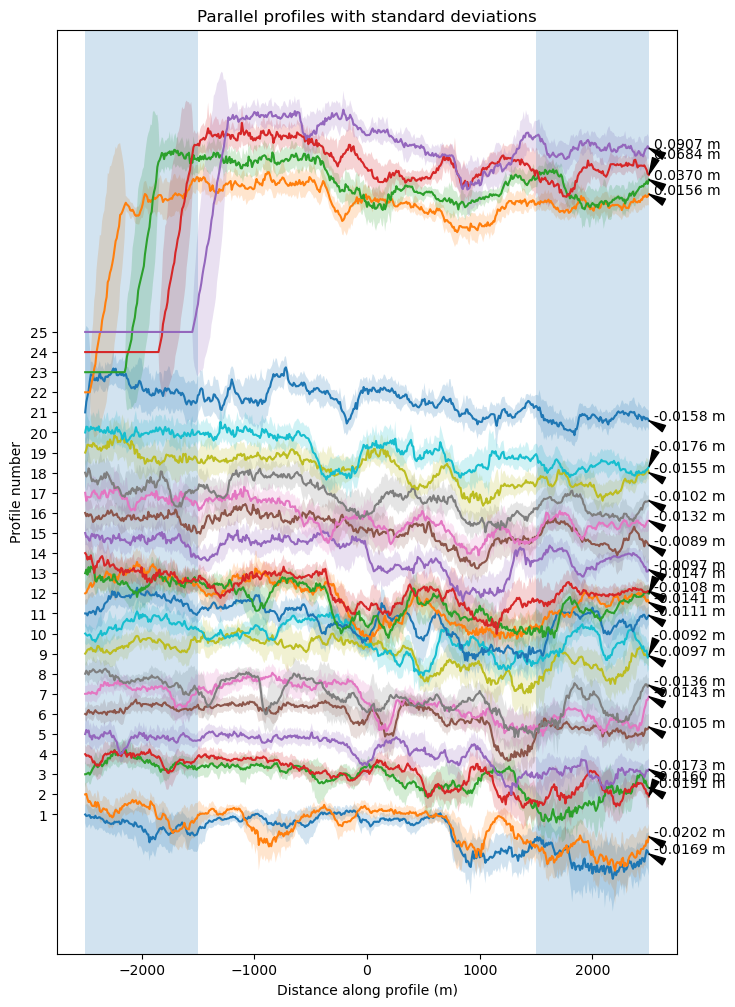

In [67]:
## Good one!
shift = 0.01
# Profile taken at 
distance = [1500,2500]
bmin, bmax = int(distance[0]/crossSample),int(distance[1]/crossSample)#150,250
#meandisp = {'perp':[],'par':[],'vert':[]}
meandisp = {'par':[]}
stdev = {'perp':[],'par':[],'vert':[]}
trackdist = {'perp':[],'par':[],'vert':[]}
centerlats = {'perp':[],'par':[],'vert':[]}
centerlons = {'perp':[],'par':[],'vert':[]}
#for track, j, title in zip([perpdf, pardf, vertdf], meandisp.keys(),['Perpendicular','Parallel','Vertical']):
for track, j, title in zip([pardf], meandisp.keys(),['Parallel']):
    plt.figure(figsize=(8,12))
    plt.title(f'{title} profiles with standard deviations')

    yticks = []
    yticklabels = []
    last_y = None  # To track the y-position of the last label
    
    for i in track.id.unique():
        prof = track[track.id==i]
        print(i,prof[prof.linedist > distance[0]].stackmean.mean()-prof[prof.linedist <= -distance[0]].stackmean.mean())
        meandisp[j].append(prof[prof.linedist > distance[0]].stackmean.mean()-prof[prof.linedist <= -distance[0]].stackmean.mean())
        stdev[j].append(np.std(prof[prof.linedist > distance[0]].stackmean.values-prof[prof.linedist <= -distance[0]].stackmean.values))
        trackdist[j].append(dist*(i+1))
        if i == np.median(track.id.unique()):
            centerlons[j].append(prof.lon.unique())
            centerlats[j].append(prof.lat.unique())
        
        y_position = (i + 1)  # Ensure y_position is starting from 1 through 25
        profile_line = prof.stackmean - prof.stackmean.iloc[0] + y_position * shift
        plt.plot(prof.linedist, profile_line)
        plt.fill_between(prof.linedist, profile_line - prof.stdev, profile_line + prof.stdev, alpha=0.2)

        # Determine the annotation y-position to avoid overlap
        label_y = profile_line.iloc[-1]
        if last_y is not None and abs(label_y - last_y) < shift*0.5:  # Adjust this threshold as needed
            label_y += shift*0.8  # Shift the label up by 0.5 units if too close to the previous one

        # Annotate the meandisp near the right edge of the plot, with the span in parentheses
        plt.annotate(f'{meandisp[j][int(i)]:.4f} m',
                     xy=(prof.linedist.max(), profile_line.iloc[-1]),  # Position at the right edge of the profile
                     xytext=(prof.linedist.max() + 50, label_y),  # Adjusted label position to avoid overlap
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                     fontsize=10, color='black', ha='left')

        last_y = label_y  # Update last_y to the current label's y-position

        yticks.append(y_position * shift)
        yticklabels.append(str(int(y_position)))

    plt.axvspan(distance[0],distance[1],alpha=0.2)
    plt.axvspan(-distance[0],-distance[1],alpha=0.2)
    plt.yticks(yticks, yticklabels)
    plt.xlabel('Distance along profile (m)')
    plt.ylabel('Profile number')


In [45]:
summed_profile = []
for i in track.id.unique():
    summed_profile.append(track[track.id==i].stackmean.values)
summed_profile = np.array(summed_profile)

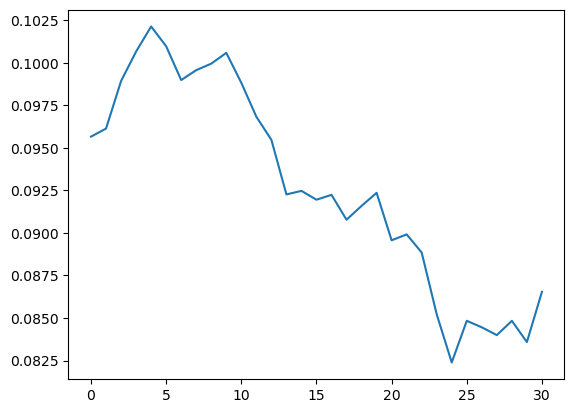

In [50]:
plt.plot(summed_profile.sum(axis=0)/len(summed_profile))

,Unnamed: 0,id,lon,lat,linedist,az,stackmean,stdev
12024,12024,24.0,-120.823014,36.241098,-2500.915764,50.180714,0.000000,NaN
12025,12025,24.0,-120.823014,36.241098,-2490.912111,50.180714,0.000000,NaN
12026,12026,24.0,-120.823014,36.241098,-2480.908459,50.180765,0.000000,NaN
12027,12027,24.0,-120.823014,36.241098,-2470.904806,50.180816,0.000000,NaN
12028,12028,24.0,-120.823014,36.241098,-2460.901154,50.180866,0.000000,NaN
...,...,...,...,...,...,...,...,...
12520,12520,24.0,-120.823014,36.241098,2460.906343,50.205780,0.089398,0.007665
12521,12521,24.0,-120.823014,36.241098,2470.910038,50.205831,0.091013,0.006397
12522,12522,24.0,-120.823014,36.241098,2480.913733,50.205881,0.091353,0.006089
12523,12523,24.0,-120.823014,36.241098,2490.917428,50.205932,0.092402,0.006060
